In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

from sklearn.impute import SimpleImputer,KNNImputer

In [34]:
df = pd.read_csv("data/train.csv", index_col='PassengerId')
df.head(2)

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
PassengerId,,,,,,,,,,,,,
0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True


# Data Treatment

In [44]:
def feature_inputer(df:pd.DataFrame) -> pd.DataFrame:
    to_mode = ['HomePlanet', 'CryoSleep', 'Destination']

    for col in to_mode:
        mode_inputer = SimpleImputer(strategy='most_frequent')
        df[col] = mode_inputer.fit_transform(df[[col]])

    to_median = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
    for col in to_median:
        inputer = SimpleImputer(strategy='median')
        df[col] = inputer.fit_transform(df[[col]])
    return df
    
def dtype_memory_reducer(df: pd.DataFrame) -> pd.DataFrame:
    df['CryoSleep'] = df['CryoSleep'].astype(bool)
    df['VIP'] = df['VIP'].astype(bool)

    df['HomePlanet'] = df['HomePlanet'].astype('category')
    df['Destination'] = df['Destination'].astype('category')
    return df

def outliers_to_log(df:pd.DataFrame) -> pd.DataFrame:
    to_log = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
    for col in to_log:
        df[col] = np.log(df[col] + 1)
    return df

def vip_knn_input(df: pd.DataFrame) -> pd.DataFrame:
    inputer = KNNImputer(n_neighbors=5)
    df['VIP'] = inputer.fit_transform(df[['VIP','RoomService']])[:,0]
    return df

def treat_dataset(df:pd.DataFrame) -> pd.DataFrame:
    df = feature_inputer(df)
    df = vip_knn_input(df)
    df = outliers_to_log(df)
    df = dtype_memory_reducer(df)
    return df

# Numeric Features

In [13]:
df[['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].corr()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
Age,1.000000,0.068723,0.130421,0.033133,0.123970,0.101007
RoomService,0.068723,1.000000,-0.015889,0.054480,0.010080,-0.019581
FoodCourt,0.130421,-0.015889,1.000000,-0.014228,0.221891,0.227995
ShoppingMall,0.033133,0.054480,-0.014228,1.000000,0.013879,-0.007322
Spa,0.123970,0.010080,0.221891,0.013879,1.000000,0.153821
VRDeck,0.101007,-0.019581,0.227995,-0.007322,0.153821,1.000000


In [35]:
df = treat_dataset(df)

TypeError: 'NoneType' object is not subscriptable

In [31]:
inputer = KNNImputer(n_neighbors=5)


array([0., 0., 1., ..., 0., 0., 0.])

<AxesSubplot: >

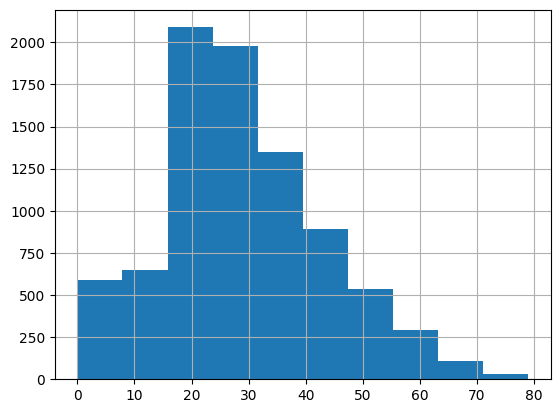

In [20]:
df['Age'].hist()

In [10]:
df[df['VRDeck'].isna()].isna().sum()

HomePlanet        1
CryoSleep         7
Cabin             4
Destination       2
Age               4
VIP               1
RoomService       2
FoodCourt         6
ShoppingMall      6
Spa               3
VRDeck          188
Name              4
Transported       0
dtype: int64

# Cabin Features
The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.

In [76]:
cabin_features['deck'].replace("T","G")

PassengerId
0001_01    B
0002_01    F
0003_01    A
0003_02    A
0004_01    F
          ..
9276_01    A
9278_01    G
9279_01    G
9280_01    E
9280_02    E
Name: deck, Length: 8693, dtype: object

In [77]:
df = df_train.copy()

In [85]:
df.groupby(df['Destination'].isna())['Transported'].mean()

Destination
False    0.503584
True     0.505495
Name: Transported, dtype: float64

In [91]:
df.groupby(['side'])['Transported'].agg(['count','mean'])

,count,mean
side,,
P,4206,0.451260
S,4288,0.555037


# Bills

In [23]:
df['0_bills'] = df[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].sum(axis=1) == 0
df.groupby('0_bills')['VIP'].agg(['count','mean'])

,count,mean
0_bills,,
False,4930,0.034686
True,3560,0.007865


In [57]:
df_train.corr()['0_bills'].sort_values()

C:\Users\gonca\AppData\Local\Temp\ipykernel_13056\4167123571.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_train.corr()['0_bills'].sort_values()


RoomService    -0.286793
ShoppingMall   -0.243392
FoodCourt      -0.241778
Spa            -0.233378
Age            -0.230221
VRDeck         -0.226161
Transported     0.481628
0_bills         1.000000
Name: 0_bills, dtype: float64